## Mini Project 3

In [84]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [85]:
sns.set(style="white",color_codes=True)

In [86]:
# Read the dataset

titanic = pd.read_excel('TITANIC.xlsx')

In [87]:
# Checking the head of the database(titanic)

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [88]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [89]:
# Check for missing values

print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [90]:
# Replace numerical missing values with mean of the column(Age)

titanic['age'].fillna(titanic['age'].mean(), inplace=True)

In [91]:
# Checking for missing values again to see if column (age) has been replaced by mean value

print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [92]:
# Replace non-numerical missing values with 'Uknown' of the column(deck) and column(embark_town)

titanic['deck'].fillna('Unknown', inplace=True)
titanic['embark_town'].fillna('Unknown', inplace=True)
titanic['embarked'].fillna('Unknown', inplace=True)

In [93]:
# Checking for missing values again to see if column (age) has been replaced by mean value

print(titanic.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


### Q1) What is the survival rate of the passengers?

In [94]:
# Checking the survival rate of the passengers

survival_rate = titanic['survived'].mean() * 100
print(f"Survival rate: {survival_rate:.2f}%")

Survival rate: 38.38%


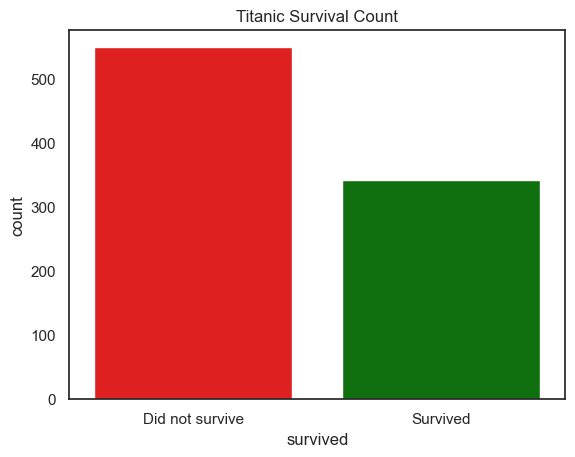

In [95]:
# Visualization of survival rate of the passengers using countplot

sns.countplot(x='survived', data=titanic, palette=['red','green'])
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.title('Titanic Survival Count')
plt.show()

### Q2) What is the gender distribution of the passengers

In [96]:
# Counting each gender
gender_counts = titanic['sex'].value_counts()
gender_counts

sex
male      577
female    314
Name: count, dtype: int64

In [97]:
# Checking for the gender distribution of the passengers

gender_percent = titanic['sex'].value_counts(normalize=True) * 100
print('Gender Percent in %:')
gender_percent

Gender Percent in %:


sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

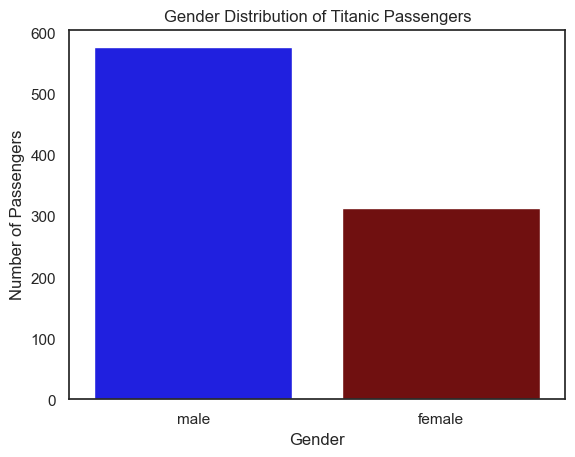

In [98]:
# Visualization checking for the gender distribution of the passengers using countplot

sns.countplot(x='sex', data=titanic, palette=['blue', 'maroon'])
plt.title('Gender Distribution of Titanic Passengers')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')

plt.show()

### Q3) How does the survival rate differ by class

In [99]:
# Survival rate differ by class

survival_by_class = titanic.groupby('pclass')['survived'].mean() * 100
print('Survival rate by class: in %')
survival_by_class

Survival rate by class: in %


pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64

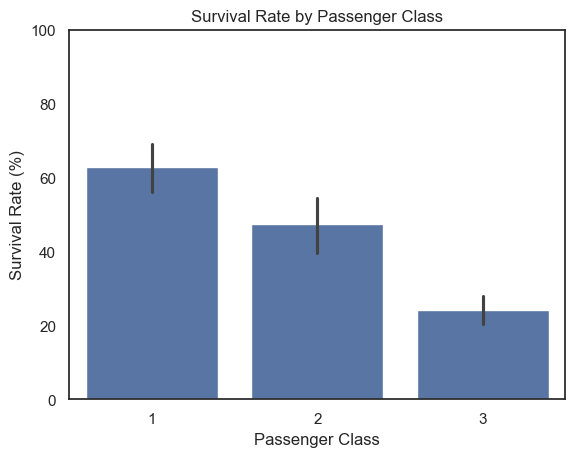

In [100]:
# Survival rate differ by class visualized as bar chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='pclass', y='survived', data=titanic, estimator=lambda x: x.mean() * 100)
plt.ylabel('Survival Rate (%)')
plt.xlabel('Passenger Class')
plt.title('Survival Rate by Passenger Class')
plt.ylim(0, 100)
plt.show()

### Q4) What is the distribution of passengers ages

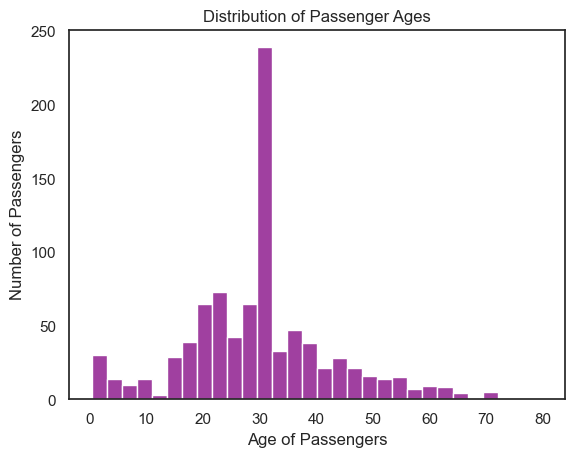

In [101]:
# Distribution of passengers by age using histogram chart

sns.histplot(data=titanic, x='age', bins=30, kde=False, color="purple")
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age of Passengers')
plt.ylabel('Number of Passengers')
plt.show()

### Q5) How many passengers embarked from each location

In [102]:
# Number of passengers that embarked from each location

embarked_counts = titanic['embarked'].value_counts()
embarked_counts

embarked
S          644
C          168
Q           77
Unknown      2
Name: count, dtype: int64

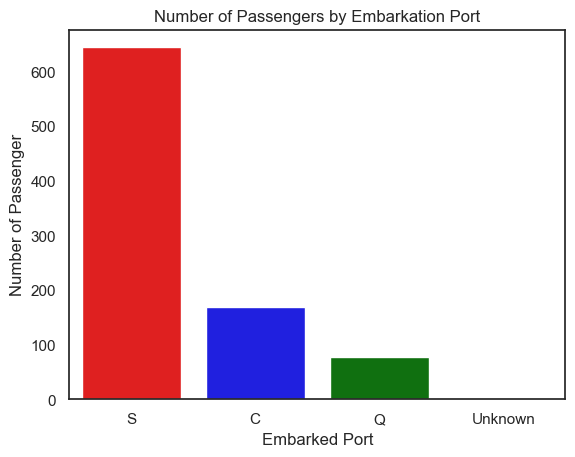

In [103]:
# Visualization of passengers that embarked from each location using bar chart

sns.countplot(x='embarked', data=titanic, palette=['red', 'blue', 'green', 'purple'])
plt.title('Number of Passengers by Embarkation Port')
plt.xlabel('Embarked Port')
plt.ylabel('Number of Passenger')
plt.show()

### Q6) What is the average fare paid per class

In [104]:
# The average fare paid per class

average_fare_per_class = titanic.groupby('pclass')['fare'].mean()
print('Average fare paid per class:')
average_fare_per_class

Average fare paid per class:


pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

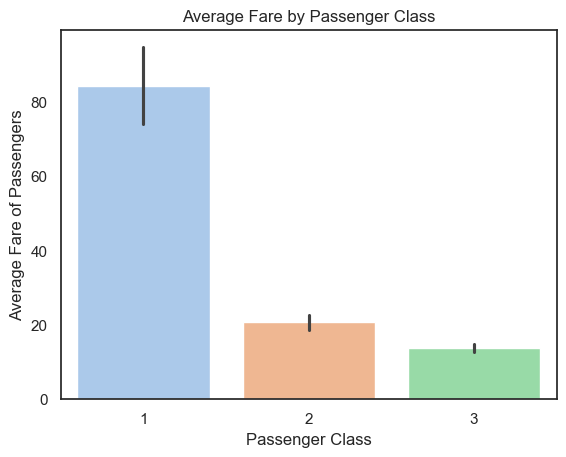

In [105]:
# The average fare paid per class using bar chart

sns.barplot(x='pclass', y='fare', data=titanic, estimator='mean', palette='pastel')
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare of Passengers')
plt.show()

### Q7) How does gender affect survival rate

In [106]:
# How does gender affect survival rate

gender_survival_rate = titanic.groupby('sex')['survived'].mean() * 100
print('Gender affect the survival rate by: ')
gender_survival_rate

Gender affect the survival rate by: 


sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

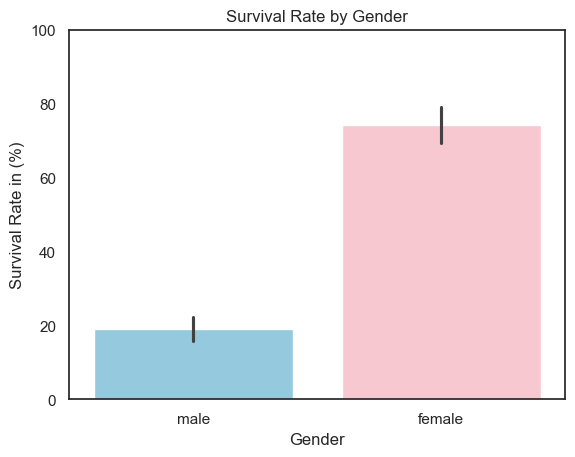

In [107]:
# Gender affect survival rate using bar chart

sns.barplot(x='sex', y='survived', data=titanic, estimator=lambda x: x.mean() * 100, palette=['skyblue', 'pink'])
plt.ylabel('Survival Rate in (%)')
plt.xlabel('Gender')
plt.title('Survival Rate by Gender')
plt.ylim(0, 100)
plt.show()


### Q8) What is the correlation between fair and survival

In [108]:
# What is the correlation between fair and survival

correlation = titanic['fare'].corr(titanic['survived'])
print(f"Correlation between fare and survival: {correlation:.2f}")

Correlation between fare and survival: 0.26


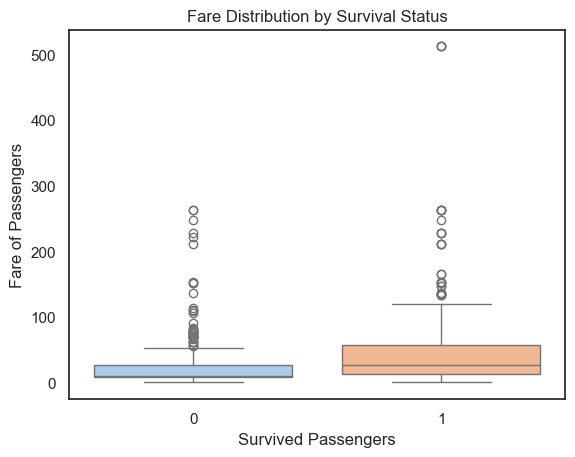

In [109]:
# What is the correlation between fair and survival visualization

sns.boxplot(x='survived', y='fare', data=titanic, palette='pastel')
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare of Passengers')
plt.xlabel('Survived Passengers')
plt.show()


### Q9) How does the number of siblings/spouses aboard affect the survival

In [110]:
# How does the number of siblings/spouses aboard affect the survival

sibsp_survival_rate = titanic.groupby('sibsp')['survived'].mean() * 100
sibsp_survival_rate

sibsp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: survived, dtype: float64

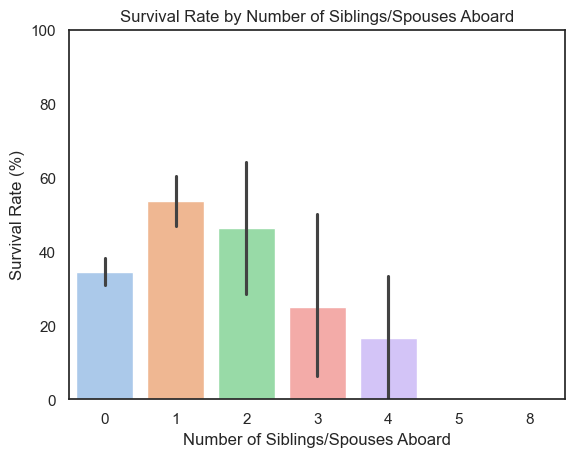

In [112]:
# How does the number of siblings/spouses aboard affect the survival using bar chart

sns.barplot(x='sibsp', y='survived', data=titanic, estimator=lambda x: x.mean() * 100, palette='pastel')
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.show()

### Q10) What is the age distribution by class

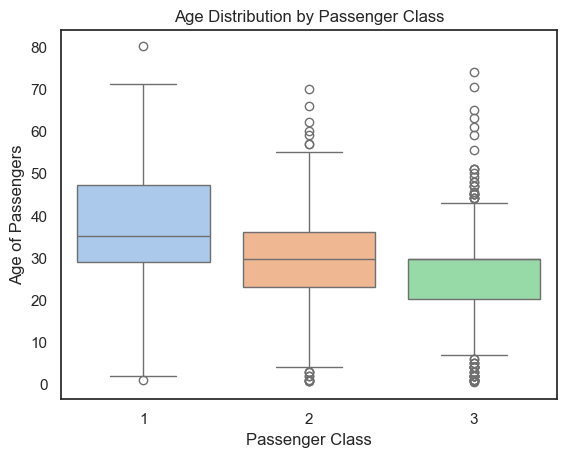

In [118]:
# What is the age distribution by class using boxplot

sns.boxplot(x='pclass', y='age', data=titanic, palette='pastel')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age of Passengers')
plt.show()

### Q11) What is the survival rate by embarkation point?

In [114]:
# What is the survival rate by embarkation point

survival_by_embark = titanic.groupby('embarked')['survived'].mean() * 100
print(survival_by_embark)

embarked
C           55.357143
Q           38.961039
S           33.695652
Unknown    100.000000
Name: survived, dtype: float64


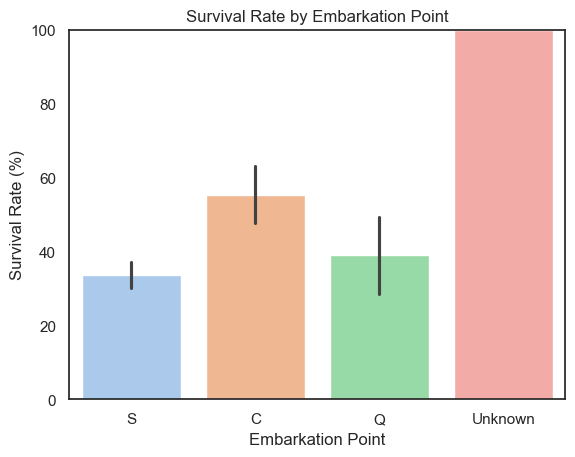

In [115]:
# What is the survival rate by embarkation point visualized using bar chart

sns.barplot(x='embarked', y='survived', data=titanic, estimator=lambda x: x.mean() * 100, palette='pastel')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Embarkation Point')
plt.title('Survival Rate by Embarkation Point')
plt.ylim(0, 100)
plt.show()

### Q12) What is the impact of having parents/chilldren aboard on survival

In [116]:
# What is the impact of having parents/chilldren aboard on survival

parch_survival_rate = titanic.groupby('parch')['survived'].mean() * 100
print(parch_survival_rate)

parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: survived, dtype: float64


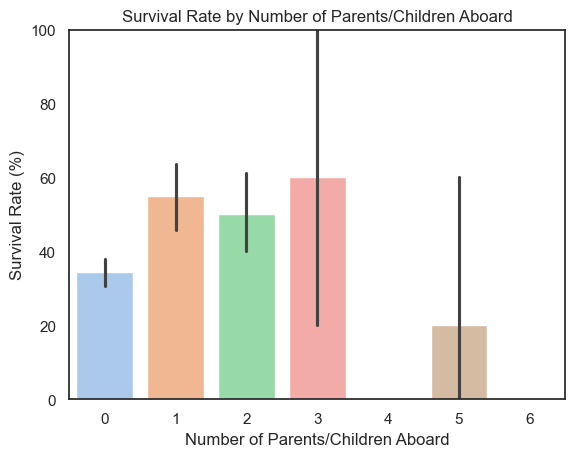

In [117]:
# What is the impact of having parents/chilldren aboard on survival visualized using bar chart

sns.barplot(x='parch', y='survived', data=titanic, estimator=lambda x: x.mean() * 100, palette='pastel')
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.show()